In [2]:
import numpy as np
import pandas as pd
# import talib as ta
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.decomposition import PCA
from numpy import linalg as LA
from tqdm import *
import math as math

In [3]:
df = pd.read_excel('中债估值2021-01-29(114658.SZ).xls')
# del df['Unnamed: 0']

In [4]:
df.head()

,时间,可信度,待偿年限,日间估价全价,日间应计利息,估价净价,估价收益率(%),剩余本金,估价修正久期,估价凸性,估价基点价值,日终估价全价,日终应计利息
0,2021-01-28,推荐,1.9808,100.1515,0.1381,100.0134,7.1882,100,1.5243,3.9426,0.0153,100.1712,0.1578
1,2021-01-27,推荐,1.9836,100.1434,0.1184,100.0251,7.1810,100,1.5269,3.9534,0.0153,100.1632,0.1381
2,2021-01-26,推荐,1.9863,100.1245,0.0986,100.0258,7.1809,100,1.5295,3.9636,0.0153,100.1442,0.1184
3,2021-01-25,推荐,1.9890,100.1121,0.0789,100.0332,7.1766,100,1.5321,3.9742,0.0153,100.1318,0.0986
4,2021-01-22,推荐,1.9973,100.0777,0.0197,100.0580,7.1619,100,1.5400,4.0061,0.0154,100.0975,0.0395


In [5]:
df = df.dropna(how='any')

In [6]:
df = df.sort_values(by='时间')

In [7]:
df['可信度'].unique().tolist()

['推荐']

In [8]:
df.columns

Index(['时间', '可信度', '待偿年限', '日间估价全价', '日间应计利息', '估价净价', '估价收益率(%)', '剩余本金',
       '估价修正久期', '估价凸性', '估价基点价值', '日终估价全价', '日终应计利息'],
      dtype='object')

In [9]:
choose_factor = [i for i in df.columns if i not in ['可信度','日终估价全价','剩余本金','日终应计利息','时间']]

In [10]:
choose_feature = df[choose_factor]

In [11]:
choose_feature

,待偿年限,日间估价全价,日间应计利息,估价净价,估价收益率(%),估价修正久期,估价凸性,估价基点价值
250,2.9645,100.6990,0.2557,100.4432,7.0079,2.3429,8.0126,0.0236
249,2.9617,100.6690,0.2754,100.3936,7.0286,2.3399,7.9948,0.0236
248,2.9590,100.7042,0.2951,100.4091,7.0215,2.3375,7.9817,0.0235
247,2.9563,100.7081,0.3148,100.3933,7.0278,2.3348,7.9663,0.0235
246,2.9536,100.7520,0.3344,100.4176,7.0171,2.3325,7.9538,0.0235
...,...,...,...,...,...,...,...,...
4,1.9973,100.0777,0.0197,100.0580,7.1619,1.5400,4.0061,0.0154
3,1.9890,100.1121,0.0789,100.0332,7.1766,1.5321,3.9742,0.0153
2,1.9863,100.1245,0.0986,100.0258,7.1809,1.5295,3.9636,0.0153
1,1.9836,100.1434,0.1184,100.0251,7.1810,1.5269,3.9534,0.0153


In [12]:
choose_label = df['日终估价全价']

In [13]:
X_train = choose_feature.head(150)
y_train = choose_label.head(150)
X_test = choose_feature.tail(120)
y_test = choose_label.tail(120)

In [14]:
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
def dataPlot():
    '''
    基于相关性系数计算结果来绘制
    '''
    fig,ax=plt.subplots(figsize=(18,8))
#     key_list=['A','B','C','D','E','F','G','H']
    sns.heatmap(pd.DataFrame(np.round(X_train[choose_factor].corr(),4),columns=choose_factor,index=choose_factor),annot=True,vmax=1,vmin=0,xticklabels=True,
                             yticklabels=True,square=True,cmap="YlGnBu")
    ax.set_title(' 影响度前十因子相关性 ', fontsize=18)
    ax.set_ylabel('Y', fontsize=16)
    ax.set_xlabel('X', fontsize=16)

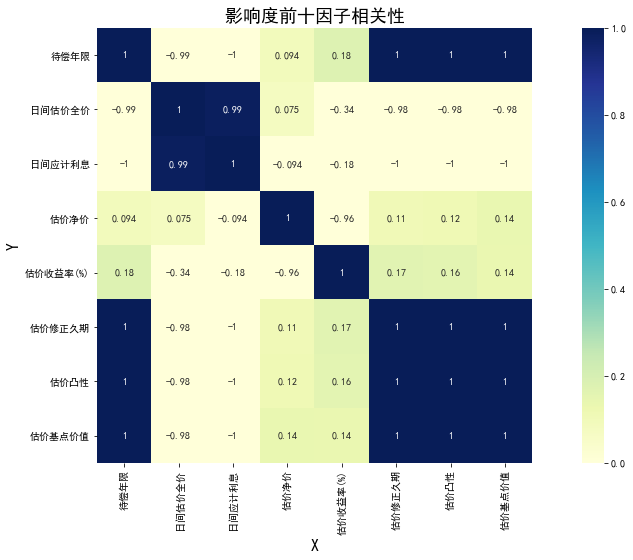

In [15]:
dataPlot()

# 对数据进行训练测试集分开

In [16]:
import xgboost as xgb 
import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

# 引入随机森林模型

In [17]:
# from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [18]:
print(np.isnan(choose_feature).any())

待偿年限        False
日间估价全价      False
日间应计利息      False
估价净价        False
估价收益率(%)    False
估价修正久期      False
估价凸性        False
估价基点价值      False
dtype: bool


In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 训练随机森林解决回归问题
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred_rf = regressor.predict(X_test)

# 评估回归性能
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

NameError: name 'y_pred' is not defined

In [82]:
plots = pd.DataFrame(y_pred_rf,y_test).reset_index()

In [83]:
plots.columns = ['predict','true']

In [84]:
plots.index = df['时间'].tail(120)

In [85]:
plots

,predict,true
时间,,
2020-08-07,104.5409,104.526908
2020-08-10,104.6145,104.635990
2020-08-11,104.6726,104.683716
2020-08-12,104.7024,104.715306
2020-08-13,104.7921,104.782025
...,...,...
2021-01-22,100.0975,102.955002
2021-01-25,100.1318,102.955002
2021-01-26,100.1442,102.954892


array([<AxesSubplot:xlabel='时间'>, <AxesSubplot:xlabel='时间'>], dtype=object)

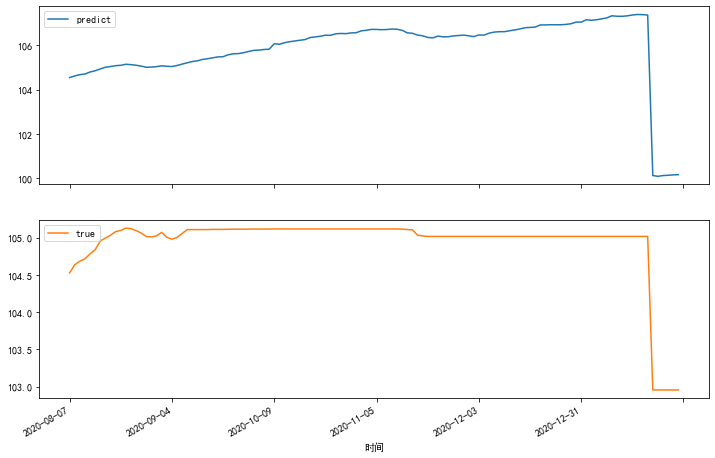

In [86]:
plots.plot(figsize=(12,8),subplots=True)

## 查看因子的重要性

In [87]:
# 查看特征
importances = regressor.feature_importances_ 
importances_df = pd.DataFrame([choose_factor, importances], index=['Features', 'Importances']).T
importances_df.sort_values(by='Importances',ascending=False).head(10)

,Features,Importances
1,日间估价全价,0.249464
2,日间应计利息,0.20939
5,估价修正久期,0.168636
0,待偿年限,0.148485
6,估价凸性,0.135382
7,估价基点价值,0.0852474
4,估价收益率(%),0.00204381
3,估价净价,0.00135168


In [88]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

<AxesSubplot:title={'center':'因子重要性排序'}, xlabel='Features'>

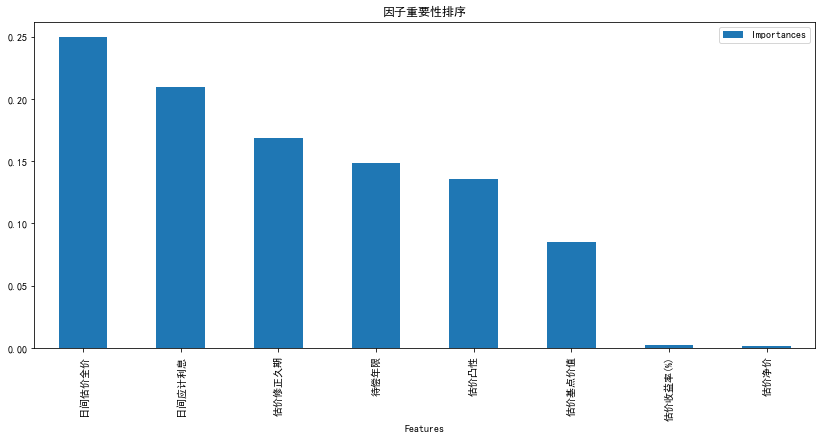

In [89]:
importances_df.set_index('Features').sort_values(by='Importances',ascending=False).head(10).plot.bar(figsize=(14,6),title='因子重要性排序')

In [90]:
# 将模型打分和形成 confusion_matrix 的过程定义为函数
def model_evaluation(estimator, train_data, real_mark):
    # 使用模型预测
    
    regressor = RandomForestRegressor(n_estimators=200, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    # 计算模型打分
    compare_df = pd.DataFrame({'Real': real_mark, 'Predict': y_pred})
    compare_df['mark'] = ~np.logical_xor(compare_df.Predict, compare_df.Real)
    score = estimator.score(train_data, real_mark)
    print(f'Accuracy: {score}\n\nConfusion matrix:\n')
    # 计算 confusion matrix
    confusion = confusion_matrix(real_mark, predict, labels=[0,1])
    confusion_df = pd.DataFrame(confusion, index=['0_real', '1_real'], columns=['0_predict', '1_predict'] )
    return confusion_df

# 多元线性回归模型预测全债价格

In [62]:
from sklearn.linear_model import LinearRegression  # 线性回归
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model.fit(X_train,y_train)   # 线性回归建模
print('系数矩阵:\n',model.coef_)
print('线性回归模型:\n',model)
# 使用模型预测
predicted = model.predict(X_test)

系数矩阵:
 [ 1.03232989e-03  6.28949109e-01  5.82083293e-01  1.00388817e-01
  3.83907086e-05 -1.36408770e-02 -4.33257567e-04 -6.42271939e-05]
线性回归模型:
 LinearRegression(n_jobs=1)


In [64]:
plots = pd.DataFrame(predicted,y_test).reset_index()

In [65]:
plots.columns = ['predict','true']

In [66]:
plots.index = df['时间'].tail(120)

In [67]:
plots

,predict,true
时间,,
2020-08-07,104.5409,104.540969
2020-08-10,104.6145,104.614570
2020-08-11,104.6726,104.672576
2020-08-12,104.7024,104.702371
2020-08-13,104.7921,104.792170
...,...,...
2021-01-22,100.0975,100.165121
2021-01-25,100.1318,100.199516
2021-01-26,100.1442,100.211863


array([<AxesSubplot:xlabel='时间'>, <AxesSubplot:xlabel='时间'>], dtype=object)

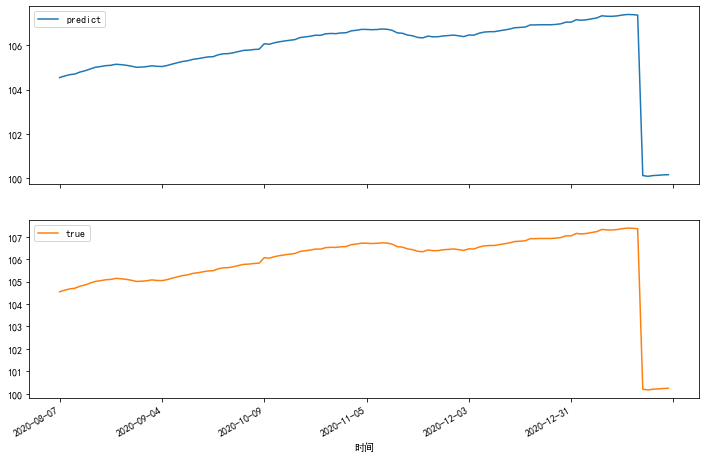

In [68]:
plots.plot(figsize=(12,8),subplots=True)

In [105]:
len(y_test)

120

In [109]:
len(df['时间'].tail(120).values)

120

In [118]:
def regression_method(model, x_train, y_train, x_test, y_test, x_pred):
    model.fit(x_train, y_train)   # 使用训练集训练样本
    score = model.score(x_test, y_test)
    result = model.predict(x_test)
    pred = model.predict(x_pred)
    #######计算模型参数#######
    ResidualSquare = (result - y_test)**2     #计算残差平方
    MSE = np.mean(ResidualSquare)       #计算均方差
    RSS = sum(ResidualSquare)   #计算残差平方和
    # print(f'R^2={score}')
    # print(f'MSE={MSE}')
    # print(f'RSS={RSS}')
    ############绘图###########
    plt.figure(1, figsize=(16,8))
    # 子图1
    plt.subplot(121)
    plt.plot(np.arange(len(result)), y_test, 'go-', label='test value')
    plt.plot(np.arange(len(result)), result, 'ro-', label='predict value')
    
#     plt.xticks(df['时间'].tail(120))
    plt.legend()        # 将样例显示出来
    # 子图2
    plt.subplot(122)
    plt.plot(np.arange(len(pred)), pred, 'bo-', label='predict value')
    ##################
    plt.suptitle(f'R^2 = {score}\nMSE = {MSE}\nRSS = {RSS}')
    plt.show()
    return pred

# 支持向量机模型预测全债价格¶

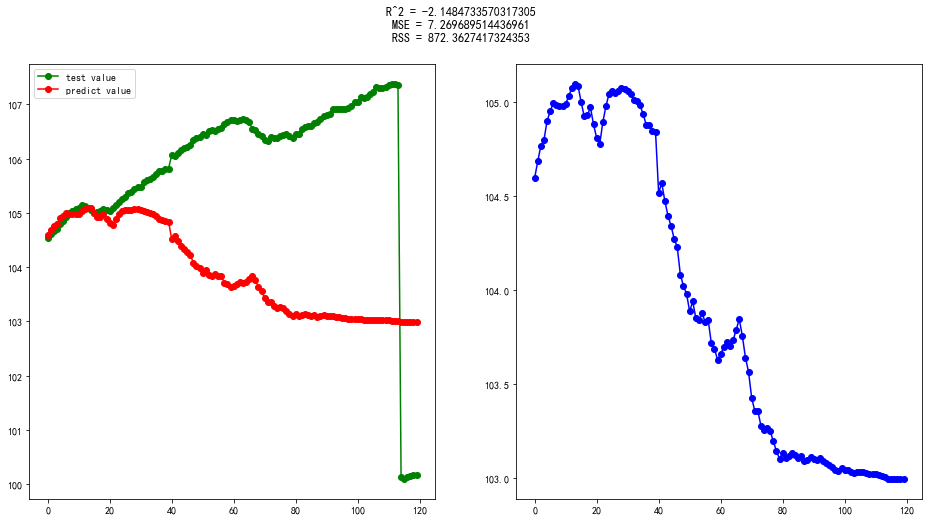

In [119]:
from sklearn import svm
model_SVR = svm.SVR()
pred = regression_method(model_SVR, X_train, y_train, X_test, y_test, X_test)  

# K邻法模型预测全债价格¶

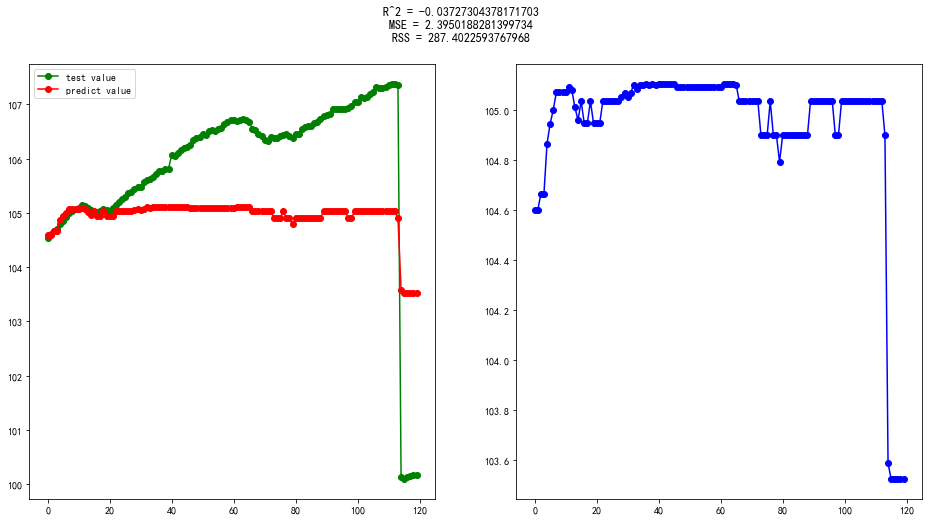

In [102]:
from sklearn import neighbors
model_KNeighborsRegressor = neighbors.KNeighborsRegressor()
pred = regression_method(model_KNeighborsRegressor, X_train, y_train, X_test, y_test, X_test)  

# GBRT模型预测全债价格¶

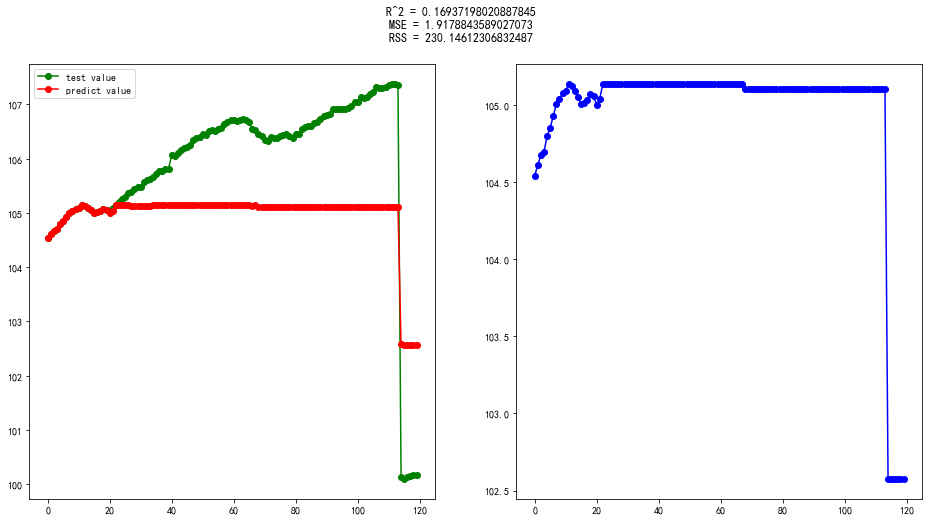

In [103]:
####4.7GBRT回归####
from sklearn import ensemble
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=100)#这里使用100个决策树
pred = regression_method(model_GradientBoostingRegressor, X_train, y_train, X_test, y_test, X_test)  

# 随机森林模型预测全债价格¶

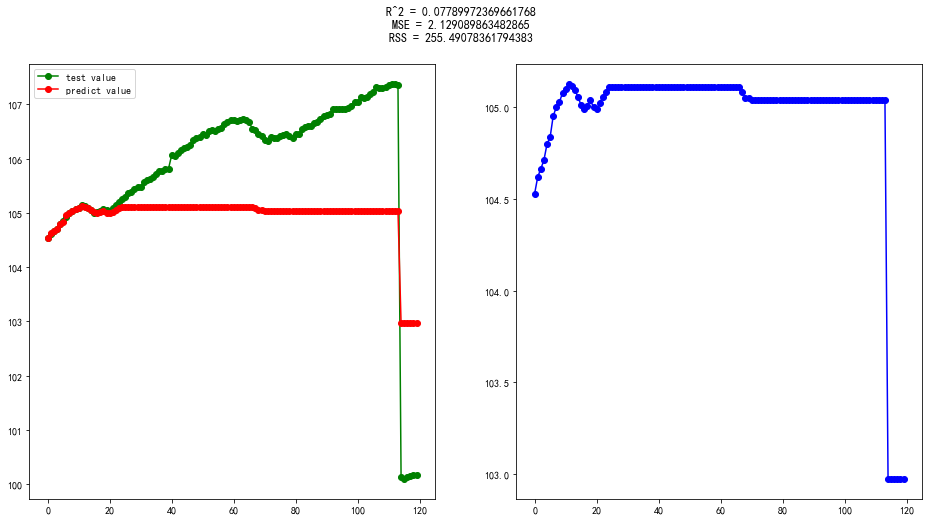

In [104]:
####4.5随机森林回归####
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)#这里使用20个决策树
pred = regression_method(model_RandomForestRegressor, X_train, y_train, X_test, y_test, X_test)  